# A ML analysis of Housing in Portland

In this project, our goal is to analyze trends in the housing market, provide insights to support first-time homebuyers, and explore pricing patterns across various regions in Oregon. By doing so, we aim to empower individuals to make well-informed decisions when purchasing a home. Below are our goals.

## Goals:
# 1. Use the data to predict the price of a house (regression)
# 2. Demonstrate what features are most important in predicting the price of a house
# 3. Use the data to predict the price of a house, compare it to the actual price


# 1) Set Up
In the set up phase we:

*  Import the neccessary packages needed for our anlysis.
*  Upload our dataset to google colab



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Provide the path to your dataset file in Google Drive
file_path = '/content/drive/MyDrive/Machine Learning Project/project/portland_housing.csv'
import pandas as pd
pdx_housing = pd.read_csv(file_path)

Mounted at /content/drive


<ipython-input-3-601231b492db>:6: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  pdx_housing = pd.read_csv(file_path)


In [ ]:
pdx_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25731 entries, 0 to 25730
Columns: 348 entries, abbreviatedAddress to zpid
dtypes: bool(11), float64(111), int64(6), object(220)
memory usage: 66.4+ MB


# 2) Cleaning
During the cleaning phase,

*   We rename the columns to appropriate names
*   Eliminate null values from the dataset.

In [ ]:
pdx_housing.rename(columns={'abbreviatedAddress': 'address', 'address/city': 'city', 'address/zipcode': 'zipcode',
                            'schools/0/distance': 'distance_to_elem_school', 'schools/0/name': 'elem_school',
                            'schools/1/distance': 'distance_to_middle_school', 'schools/1/name': 'middle_school',
                            'schools/2/distance': 'distance_to_high_school', 'schools/2/name': 'high_school'},
                   inplace=True)
pdx_housing = pdx_housing[
    ['address', 'city', 'zipcode', 'bathrooms', 'bedrooms', 'dateSold', 'daysOnZillow', 'description', 'homeStatus',
     'homeType', 'lastSoldPrice', 'latitude', 'longitude', 'livingArea', 'lotSize', 'favoriteCount', 'pageViewCount',
     'price', 'propertyTaxRate', 'rentZestimate', 'yearBuilt', 'zestimate', 'taxAssessedValue', 'taxAssessedYear']]
pdx_housing = pdx_housing.dropna(
    subset=['price', 'zestimate', 'bathrooms', 'bedrooms', 'livingArea', 'lotSize', 'favoriteCount', 'pageViewCount',
            'propertyTaxRate', 'rentZestimate', 'yearBuilt', 'taxAssessedValue', 'taxAssessedYear'])

# 3) EDA (Exploratory Data Analysis)
In this phase:


*  Explore the data set by creating histograms, barplots, boxplots.
*  Top 20 cities with the highest properties.
*  Histograms to visualise the distribution of numerical features.
*  Correlation Matrix to see how related numerical features are
*  Box plot of price for different home types eg condo, apartments etc
*  Bar Plot of house prices and the tax assessed value.












In [ ]:
#Mean price for houses is about 600,000+
pdx_housing['price'].mean()


633921.1532227902

In [ ]:
pdx_housing.head()

In [ ]:
pdx_housing.tail()

In [ ]:
pdx_housing.describe()

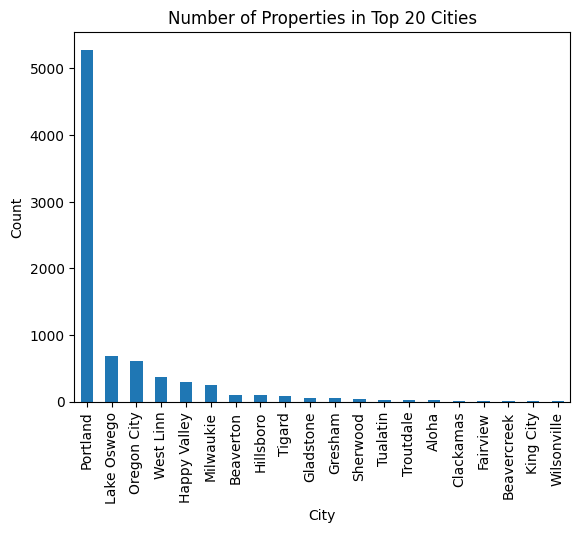

In [ ]:
#Bar plot to visualise top 20 cities with properties in Oregon

top_20_cities = pdx_housing['city'].value_counts().nlargest(20)
top_20_cities.plot(kind='bar')

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of Properties in Top 20 Cities')
plt.show()

In this EDA we try to find out the city in Oregon, which has the highest number of Properties. Here, the code creates a bar plot displaying the count of properties in the top 20 cities from a DataFrame pdx_housing. It first calculates the frequency of each city using value_counts() and selects the top 20 with nlargest(20). Then, it plots these counts as bars, with cities on the x-axis and property counts on the y-axis. Finally, it labels the axes and adds a title to the plot for clarity before displaying it.

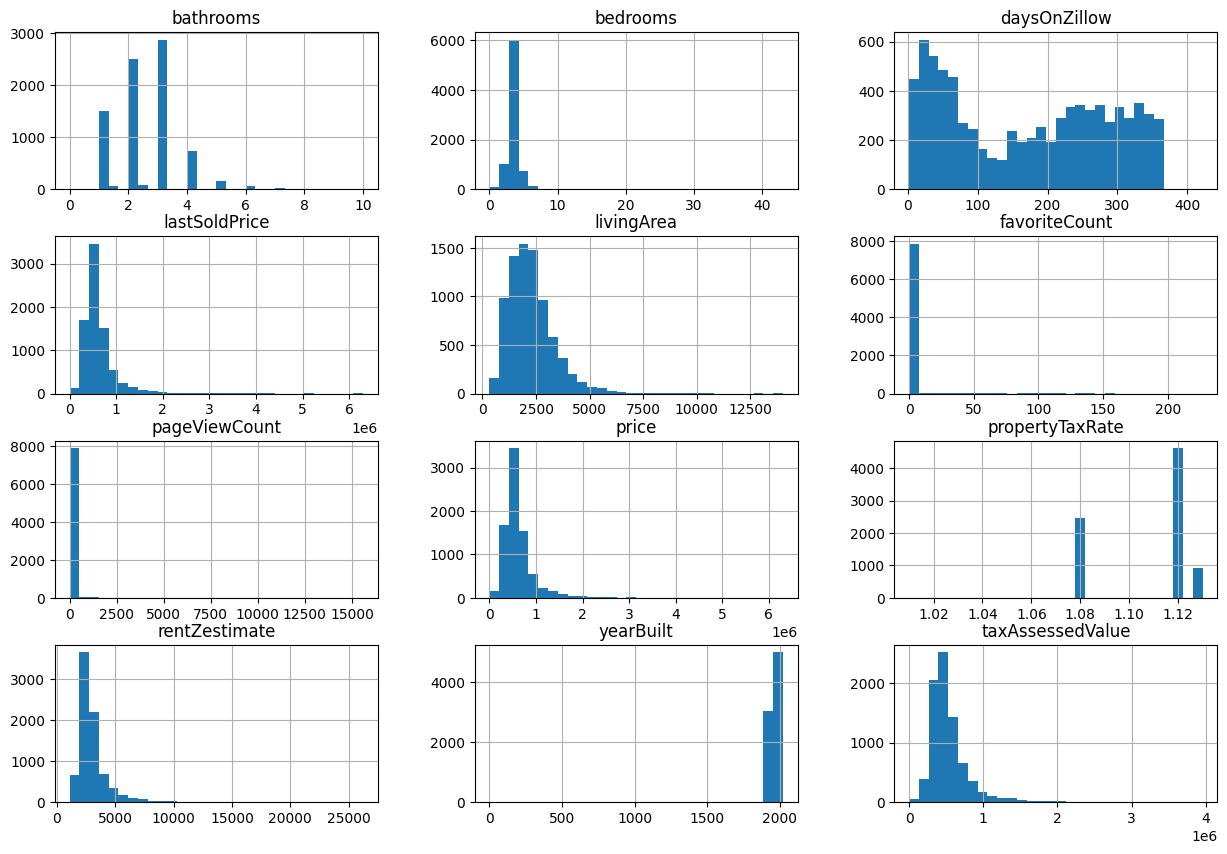

In [ ]:
#Histograms to visualise numerical features

numerical_features = ['bathrooms', 'bedrooms', 'daysOnZillow', 'lastSoldPrice', 'livingArea', 'favoriteCount', 'pageViewCount', 'price', 'propertyTaxRate', 'rentZestimate', 'yearBuilt', 'taxAssessedValue']
pdx_housing[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()


Here we created histograms to visualize the distribution of various numerical features in the housing data stored in the DataFrame pdx_housing. We did it by specifying a list of numerical features to visualize, including attributes like bathrooms, bedrooms, and property prices. Then, we plotted histograms for each feature, arranging them in a grid. Finally, we display the histograms to provide insights into the distribution of these numerical attributes in the housing dataset.




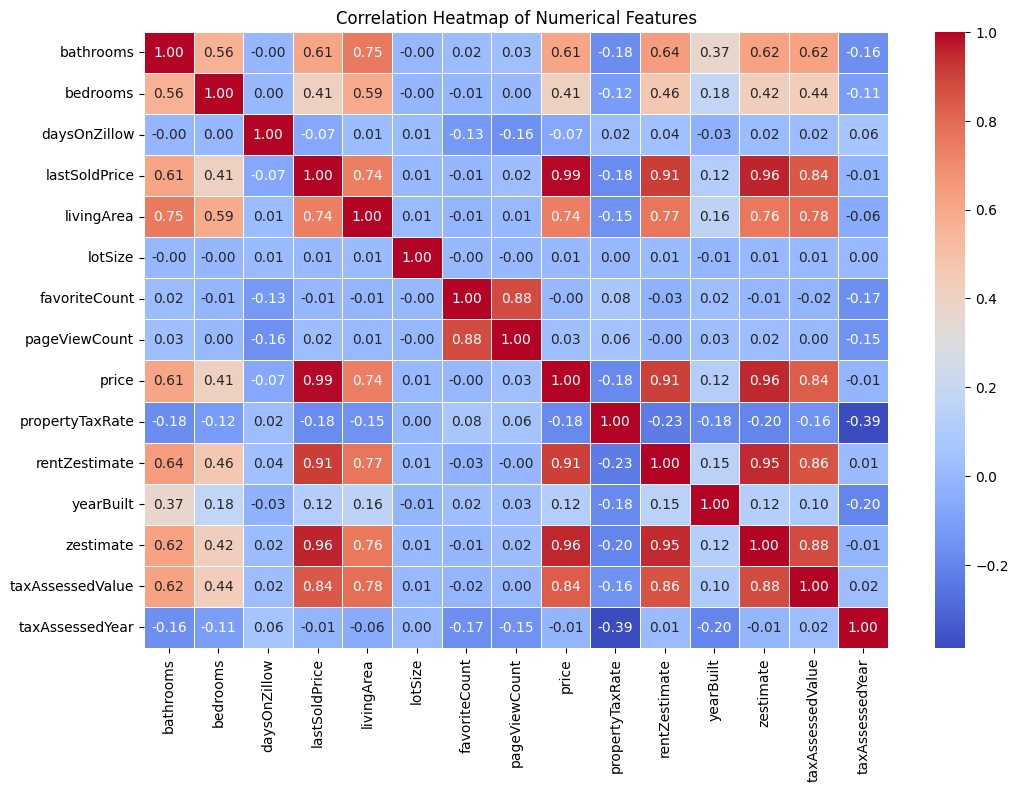

In [ ]:
#Correlation Heat Map

correlation_matrix = pdx_housing[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


*A correlation matrix provides insights into the relationship between two variables, as indicated by correlation coefficients.A correlation coefficient of +1 signifies perfect positive correlation, where variables move in tandem, while a value of 0 indicates no correlation, and -1 suggests perfect negative correlation. In this code, a correlation matrix is computed for numerical features in the portland housing data and a heatmap visualization is created using Seaborn. The heatmap visually represents the correlations between pairs of numerical features, with annotations displaying correlation coefficients. *

<Figure size 1000x800 with 0 Axes>

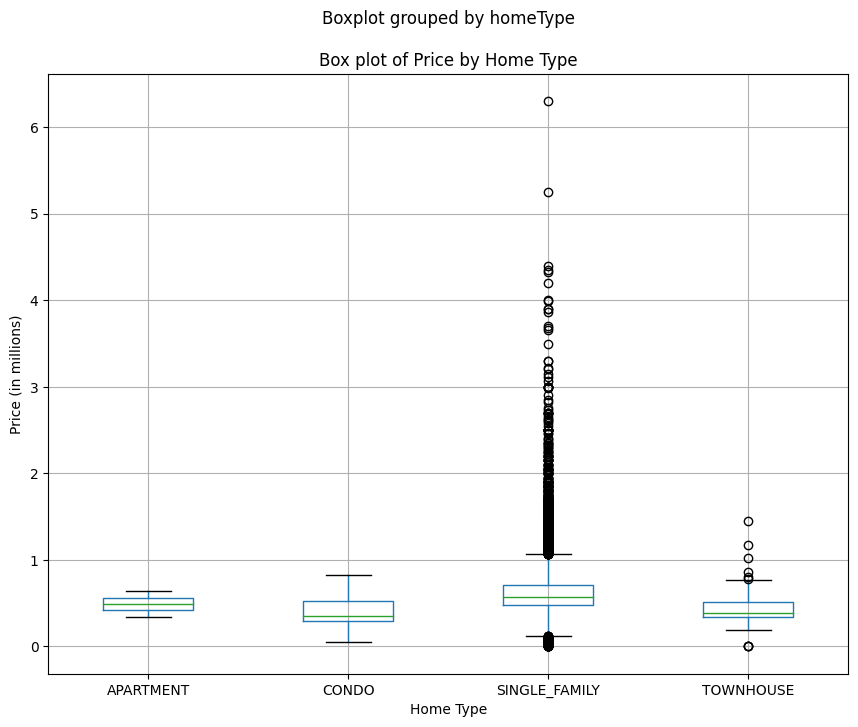

In [ ]:
#Box plot to visualise the average prices for various home types

pdx_housing['price_millions'] = pdx_housing['price'] / 1000000

plt.figure(figsize=(10, 8))
pdx_housing.boxplot(column='price_millions', by='homeType', figsize=(10, 8))
plt.title('Box plot of Price by Home Type')
plt.xlabel('Home Type')
plt.ylabel('Price (in millions)')
plt.show()


<Figure size 1200x800 with 0 Axes>

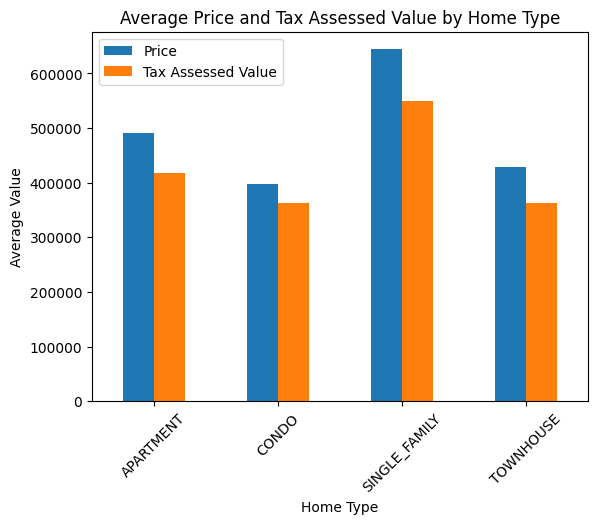

In [ ]:
#Stacked bar chart of Average price and Tax Assessed Value by Home Type.

grouped_data = pdx_housing.groupby('homeType')[['price', 'taxAssessedValue']].mean()

# Plotting
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Average Price and Tax Assessed Value by Home Type')
plt.xlabel('Home Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(['Price', 'Tax Assessed Value'])
plt.show()


**From the above bar chart, it confirms the relationship established by the correlation matrix that there is a relationship between price and tax assessed value of a home.**

# 5) Model preparation
In the Model Preparation phase:
*   Split the dataset into training and testing set in a ratio of 80:20 respectively
*   The price column is extracted from the training dataset and from the testing set
*   Select relevant features to training such as bathrooms, bedrooms, living Area etc.


In [ ]:
train, test = train_test_split(pdx_housing, test_size=0.2, random_state=42)

price_train = train['price']
price_test = test['price']

test = test[['bathrooms', 'bedrooms', 'livingArea', 'lotSize', 'favoriteCount', 'pageViewCount', 'propertyTaxRate',
             'rentZestimate', 'yearBuilt', 'taxAssessedValue', 'taxAssessedYear']]
train = train[['bathrooms', 'bedrooms', 'livingArea', 'lotSize', 'favoriteCount', 'pageViewCount', 'propertyTaxRate',
               'rentZestimate', 'yearBuilt', 'taxAssessedValue', 'taxAssessedYear']]

# 6) Linear Regression
## i) Initial Model:
* The purpose of this initial model is to find out if the data fits.
* Using our trained model we try to preidct prices on the test data.
* Finally using the MSE and R-squared score we evaluate the model's performance.

 These metrics provide insights into the accuracy and goodness-of-fit of the linear regression model in predicting housing prices.



In [ ]:
price_model_lr = LinearRegression()
price_model_lr.fit(train, price_train)
price_pred_lr = price_model_lr.predict(test)
price_mse_lr = mean_squared_error(price_test, price_pred_lr)
price_r2_lr = r2_score(price_test, price_pred_lr)

# ii) Lasso Regression

* Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

**An example of multicollinearity is when two variables are highly correlated, eg. the number of rooms in a house and the square footage of a house**

In [ ]:
price_model_lassor = Lasso()
price_model_lassor.fit(train, price_train)
price_pred_lassor = price_model_lassor.predict(test)
price_mse_lassor = mean_squared_error(price_test, price_pred_lassor)
price_r2_lassor = r2_score(price_test, price_pred_lassor)

# 7) Random Forest Regression

*  Then, the model is trained on the training data using the 'fit' method.
*  MSE and R2 are computed to asses the model's performance against the actual prices (price_test)
*   These metrics offer insights into the accuracy and predictive power of the
Random Forest Regressor in forecasting housing prices.

In [ ]:
price_model_rf = RandomForestRegressor()
price_model_rf.fit(train, price_train)
price_pred_rf = price_model_rf.predict(test)
price_mse_rf = mean_squared_error(price_test, price_pred_rf)
price_r2_rf = r2_score(price_test, price_pred_rf)

# Results : Which Model is better in predicting price ?
Here we compare our models; the random forest regression or the linear regression model.

In [ ]:
# find the best model
mse = [price_mse_lr, price_mse_lassor, price_mse_rf]
models = ['Linear Regression', 'Lasso Regression', 'Random Forest Regression']
r2 = [price_r2_lr, price_r2_lassor]

results = pd.DataFrame({'Model': models, 'MSE': mse})

best = results[results['MSE'] == results['MSE'].min()]
print(f'The best model is {best["Model"].values[0]}')

worst = results[results['MSE'] == results['MSE'].max()]
print(f'The worst model is {worst["Model"].values[0]}')

The best model is Random Forest Regression
The worst model is Linear Regression


# **Here is a test case of the actual price and the predicted price.**

In [ ]:
print(f'The 42nd house in the test data is priced at ${price_test.iloc[42]} '
      f'and the model predicts it will be priced at ${price_pred_rf[42]}')

The 42nd house in the test data is priced at $550000 and the model predicts it will be priced at $533413.75


# 8) Graphing the results
## a) Graphing linear regression


(0.0, 1000000.0)

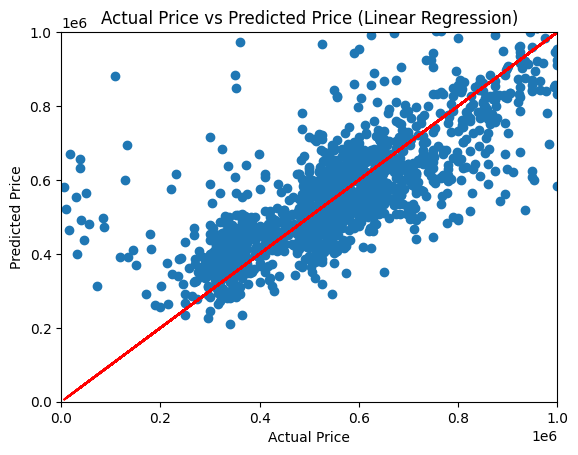

In [ ]:
plt.scatter(price_test, price_pred_lr)
plt.plot(price_test, price_test, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (Linear Regression)')
plt.xlim(0, 1000000) # set a million dollar limit
plt.ylim(0, 1000000)

##8b) Graphing random forest Results


(0.0, 1000000.0)

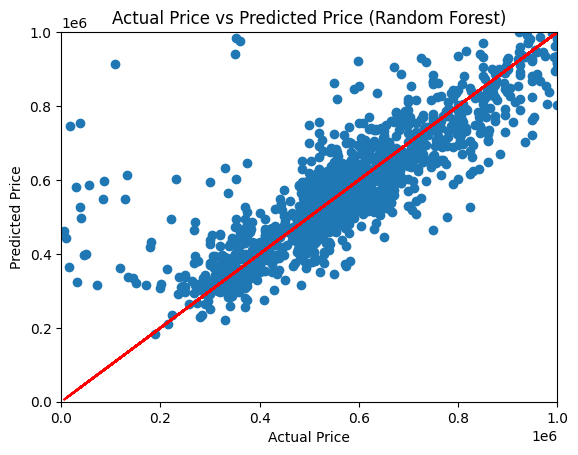

In [ ]:
plt.scatter(price_test, price_pred_rf)
plt.plot(price_test, price_test, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (Random Forest)')
plt.xlim(0, 1000000)
plt.ylim(0, 1000000)


# 9) Predicting Housing Types
For this model ;
*  Drop rows with missing target values
*  Extract features and target variables
*  Encode  categorical target variables
*  Split the dataset in an 80:20 fashion.
* We train, test and then predict the housing type using an accuracy score.

In [ ]:
pdx_housing = pdx_housing[
    ['bathrooms', 'bedrooms', 'daysOnZillow', 'lastSoldPrice', 'livingArea', 'lotSize', 'favoriteCount',
     'pageViewCount', 'price', 'propertyTaxRate', 'rentZestimate', 'yearBuilt', 'zestimate', 'taxAssessedValue',
     'taxAssessedYear', 'homeType']]

pdx_housing.dropna(subset=['homeType'], inplace=True)  # drop rows with missing target values
features = pdx_housing.drop('homeType', axis=1)  # extracting features and target variable
housing_type = pdx_housing['homeType']
le = LabelEncoder()  # encoding categorical target variable
ht_encoded = le.fit_transform(housing_type)
housing_train, housing_test, ht_train, ht_test = train_test_split(features, ht_encoded, test_size=0.2,
                                                                  random_state=42)  # splitting the data
imputer = SimpleImputer(strategy='mean') # impute missing values in the features
train_imputed = imputer.fit_transform(housing_train)
test_imputed = imputer.transform(housing_test)

rf_classifier = RandomForestClassifier() # init
rf_classifier.fit(train_imputed, ht_train) # train
ht_pred = rf_classifier.predict(test_imputed) # predict
accuracy = accuracy_score(ht_test, ht_pred) # accuracy score
print("Accuracy:", accuracy)

<ipython-input-22-90fe3fd8e9a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdx_housing.dropna(subset=['homeType'], inplace=True)  # drop rows with missing target values


Accuracy: 0.9682242990654205
